In [1]:
import os
os.chdir("D:\Generative_learning\GDL_code")

In [19]:
from models.AE import Autoencoder
import keras

AE = Autoencoder(input_dim=(28,28,1),
                encoder_conv_filters=[32,64,64,64],
                encoder_conv_kernel_size=[3,3,3,3],
                encoder_conv_strides=[1,2,2,1],
                decoder_conv_t_filters=[64,64,32,1],
                decoder_conv_t_kernel_size=[3,3,3,3],
                decoder_conv_t_strides=[1,2,2,1],
                z_dim=2)

In [9]:
AE.summary()

AttributeError: 'Autoencoder' object has no attribute 'summary'

In [26]:
from keras.layers import Input,Reshape,Activation,Flatten,Dense, Conv2D,Conv2DTranspose, BatchNormalization, LeakyReLU, Dropout
from keras.models import Model
import numpy as np

In [31]:
def build_encoder_decoder(input_shape, output_shape=None, batch_norm=False, dropout=False):
    inputs= Input(shape=input_shape)
    #encoder
    x= Conv2D(filters=32, kernel_size=3, strides=1, padding='same')(inputs)
    x=LeakyReLU()(x)
    
    x= Conv2D(filters=64, kernel_size=3, strides=2, padding='same')(x)
    x= LeakyReLU()(x)
    
    x=Conv2D(filters=64,kernel_size=3,strides=2, padding='same')(x)
    x=LeakyReLU()(x)
    
    x=Conv2D(filters=64, kernel_size=3, strides=1,padding='same')(x)
    x= LeakyReLU()(x)
    shape_before_flattening= keras.backend.int_shape(x)[1:]
    x=Flatten()(x)
    encoder_output=Dense(2,name='encoder_output')(x)
    encoder=Model(inputs,encoder_output)
    
    #decoder
    decoder_input = Input(shape=(2,), name='decoder_input')
    
    x= Dense(np.prod(shape_before_flattening))(decoder_input)
    x=Reshape(shape_before_flattening)(x)
    
    x=Conv2DTranspose(64,(3,3),strides=1,padding='same')(x)
    x= LeakyReLU()(x)
    
    x= Conv2DTranspose(64,(3,3),strides=2,padding='same')(x)
    x=LeakyReLU()(x)
    
    x=Conv2DTranspose(32,(3,3), strides=2,padding='same')(x)
    x=LeakyReLU()(x)
    
    x= Conv2DTranspose(1,(3,3), strides=1, padding='same')(x)
    x=Activation('sigmoid')(x)
    
    decoder= Model(decoder_input,x)
    model= Model(inputs = inputs, outputs= decoder(encoder_output))
    
    return encoder,decoder,model
encoder, decoder,model = build_encoder_decoder(input_shape=(28,28,1))
    



In [28]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_46 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_47 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_48 (LeakyReLU)   (None, 7, 7, 64)          0         
__________

In [29]:
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 2)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape_4 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_50 (LeakyReLU)   (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_51 (LeakyReLU)   (None, 14, 14, 64)        0         
__________

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_60 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_61 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_62 (LeakyReLU)   (None, 7, 7, 64)          0         
__________

In [36]:
from keras import backend as K
def r_loss(y_true,y_pred):
    return K.mean(K.square(y_true-y_pred),axis=[1,2,3])
model.compile(optimizer=keras.optimizers.Adam(lr=0.0001), loss=r_loss)

In [39]:
from utils.loaders import load_mnist
(x_train,y_train),(x_test,y_test)= load_mnist()

In [ ]:
from utils.callbacks import CustomCallback, step_decay_schedule

In [42]:
model.fit(x=x_train,y=x_train,batch_size=32,shuffle=True,epochs=10)

W0406 16:51:58.984502  5720 deprecation_wrapper.py:119] From C:\Users\Gurwinder\anaconda3\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0406 16:51:59.180378  5720 deprecation_wrapper.py:119] From C:\Users\Gurwinder\anaconda3\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0645
Epoch 2/10
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0540
Epoch 3/10
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0522
Epoch 4/10
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0507
Epoch 5/10
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0497
Epoch 6/10
60000/60000 [==============================] - 121s 2ms/step - loss: 0.0489
Epoch 7/10
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0482
Epoch 8/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0475
Epoch 9/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0469
Epoch 10/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0463


In [43]:
decoded_images= model.predict(x_test)

In [56]:
decoded_images[1,1,1]

array([4.4703484e-07], dtype=float32)

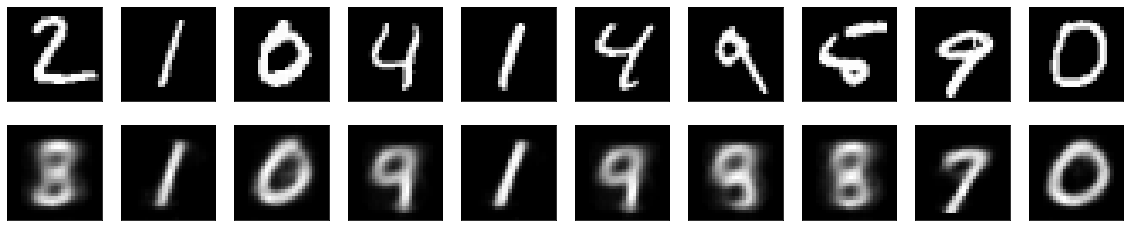

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
n=10
for i in range(1,n+1):
    ax=plt.subplot(2,n,i)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax=plt.subplot(2,n,n+i)
    plt.imshow(decoded_images[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [58]:
keras.__version__

'2.2.4'

In [59]:
class Autoencoder():
    def __init__(self,input_dims,
                encoder_conv_filters,
                encoder_conv_kernel_size,
                encoder_conv_strides,
                decoder_conv_filters,
                decoder_conv_kernel_size,
                decoder_conv_strides,
                z_dim,
                use_batch_norm=False,
                use_drop_norm=False):
        self.name='variational_encoder',
        self.encoder_conv_filters=encoder_conv_filters
        self.encoder_conv_kernel_size= encoder_conv_kernel_size
        self.encoder_conv_strides = encoder_conv_strides
        self.decoder_conv_filters = decoder_conv_filters
        self.decoder_conv_kernel_size = decoder_conv_kernel_size
        self.decoder_conv_strides = decoder_conv_strides
        self.z_dim = z_dim
        
        self.use_batch_norm = use_batch_norm
        self.use_dropout = use_dropout
        
        self.n_layers_encoder = len(encoder_conv_filters)
        self.n_layers_decoder = len(decoder_conv_filters)
        
        self._build()
    def build(self):
        encoder_input = Input(shape = self.input_dim, name='encoder_input')
        x= encoder_input
        for i in range(self.n_layers_encoder):
            conv_layer = Conv2D(filters= self.encoder_conv_filters[i],
                               kernel_size = self.encoder_conv_kernel_size[i],
                                strides = self.encoder_conv_strides[i],
                                padding='same',
                                name = 'encoder_conv_'+str(i)
                               )
            x = conv_layer(x)
            
            x= LeakyReLU()(x)
            if self.use_batch_norm:
                x= BatchNormalization()(x)
            if self.use_dropout:
                x= Dropout()(x)
            shape_before_flattening = K.int_shape(x)[1:]
            
            x= Flatten()(x)
            
            encoder_output = Dense(self.z_dim, name='encoder_output')(x)
            self.encoder = Moder(encoder_input,encoder_output)
            
            decoder_input = Input(shape=(self.z_dim,), name='decoder_input')
            
            x = Dense(np.prod(shape_before_flattening))(decoder_input)
            x = Reshape(shape_before_flattening)(x)
            
            for i in range(self.n_layers_decoder):
                conv_t_layer = Conv2DTranspose(filters= self.decoder_conv_filters[i],
                                              kernel_size = self.decoder_conv_kernel_size[i],
                                               strides = self.decoder_conv_strides[i],
                                               padding = 'same',
                                               name = 'decoder_conv_'+str(i))
                x= conv_t_layer(x)
                
                if i< self.n_layers_decoder-1:
                    x= LeakyReLU()(x)
                    
                    if self.use_batch_norm:
                        x= BatchNormalization()(x)
                    
                    if self.use_dropout:
                        x= Dropout(rate = 0.25)(x)
                else:
                    x = Activation('sigmoid')(x)
            
            decoder_output = x
            
            self.decoder = Model(decoder_input, decoder_output)
            
            #full autoencoder
            model_input = encoder_input
            model_output = self.decoder(encoder_output)
            
            self.model = Model(model_input, model_output)
        
        def compile(self,learning_rate):
            self.learning_rate = learning_rate
            
            optimizer = Adam(lr=learning_rate)
            
            def r_loss(y_true,y_pred):
                return K.mean(K.square(y_true - y_pred),axis = [1,2,3])
            self.model.compile(optimizer = optimizer , loss = r_loss)
        
                        

In [61]:
class VariationalAutoencoder():
    def __init__(self,input_dims,
                encoder_conv_filters,
                encoder_conv_kernel_size,
                encoder_conv_strides,
                decoder_conv_filters,
                decoder_conv_kernel_size,
                decoder_conv_strides,
                z_dim,
                use_batch_norm=False,
                use_drop_norm=False):
        self.name='variational_encoder',
        self.encoder_conv_filters=encoder_conv_filters
        self.encoder_conv_kernel_size= encoder_conv_kernel_size
        self.encoder_conv_strides = encoder_conv_strides
        self.decoder_conv_filters = decoder_conv_filters
        self.decoder_conv_kernel_size = decoder_conv_kernel_size
        self.decoder_conv_strides = decoder_conv_strides
        self.z_dim = z_dim
        
        self.use_batch_norm = use_batch_norm
        self.use_dropout = use_dropout
        
        self.n_layers_encoder = len(encoder_conv_filters)
        self.n_layers_decoder = len(decoder_conv_filters)
        
        self._build()
    def build(self):
        encoder_input = Input(shape = self.input_dim, name='encoder_input')
        x= encoder_input
        for i in range(self.n_layers_encoder):
            conv_layer = Conv2D(filters= self.encoder_conv_filters[i],
                               kernel_size = self.encoder_conv_kernel_size[i],
                                strides = self.encoder_conv_strides[i],
                                padding='same',
                                name = 'encoder_conv_'+str(i)
                               )
            x = conv_layer(x)
            
            
            if self.use_batch_norm:
                x= BatchNormalization()(x)
            
            x= LeakyReLU()(x)
            
            if self.use_dropout:
                x= Dropout()(x)
            shape_before_flattening = K.int_shape(x)[1:]
            
            x= Flatten()(x)
            
            self.mu = Dense(self.z_dim, name = 'mu')(x)
            self.log_var = Dense(self.z_dim, name = 'log_var')(x)
            
            encoder_mu_log_var = Model(encoder_input, (self.mu, self.log_var))
            
            def sampling(args):
                mu , log_var = args
                epsilon = K.random_normal(shape = K.shape(mu), mean = 0., stddev=1.)
                return mu+K.exp(log_var/2)*epsilon
            
            encoder_output = Lambda(sampling, name='encoder_output')([self.mu, self.log_var])
            
            encoder = Model(encoder_input, encoder_output)
            
            decoder_input = Input(shape=(self.z_dim,), name='decoder_input')
            
            x = Dense(np.prod(shape_before_flattening))(decoder_input)
            x = Reshape(shape_before_flattening)(x)
            
            for i in range(self.n_layers_decoder):
                conv_t_layer = Conv2DTranspose(filters= self.decoder_conv_filters[i],
                                              kernel_size = self.decoder_conv_kernel_size[i],
                                               strides = self.decoder_conv_strides[i],
                                               padding = 'same',
                                               name = 'decoder_conv_'+str(i))
                x= conv_t_layer(x)
                
                if i< self.n_layers_decoder-1:
                    x= LeakyReLU()(x)
                    
                    if self.use_batch_norm:
                        x= BatchNormalization()(x)
                    
                    if self.use_dropout:
                        x= Dropout(rate = 0.25)(x)
                else:
                    x = Activation('sigmoid')(x)
            
            decoder_output = x
            
            self.decoder = Model(decoder_input, decoder_output)
            
            #full autoencoder
            model_input = encoder_input
            model_output = self.decoder(encoder_output)
            
            self.model = Model(model_input, model_output)
        
        def compile(self,learning_rate, r_loss_factor):
            self.learning_rate = learning_rate
            
            optimizer = Adam(lr=learning_rate)
            
            def r_loss(y_true,y_pred):
                return K.mean(K.square(y_true - y_pred),axis = [1,2,3])
            self.model.compile(optimizer = optimizer , loss = r_loss)
            
            def vae_r_loss(y_true, y_pred):
                r_loss = K.mean(K.square(y_true - y_pred), axis =[1,2,3])
                return r_loss_factore*r_loss
            def vae_kl_loss(y_true, y_pred):
                kl_loss = -0.5*K.sum(1+self.log_var - K.square(self.mu)-K.exp(self.log_var), axis = 1)
                return kl_loss
            def vae_loss(y_true, y_pred):
                r_loss = vae_r_loss(y_true, y_pred)
                kl_loss = vae_kl_loss(y_true, y_pred)
                return r_loss + kl_loss
        
                        

In [2]:
import os
os.chdir('D:\Generative_learning\GDL_code')

In [3]:
import os

from models.VAE import VariationalAutoencoder
from utils.loaders import load_mnist

Using TensorFlow backend.


In [4]:
SECTION = 'vae'

RUN_ID = '0002'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode = 'build' 
    

In [5]:
(x_train , y_train), (x_test, y_test) = load_mnist()

In [6]:
vae = VariationalAutoencoder(input_dim = (28,28,1),
                            encoder_conv_filters = [32,64,64,64],
                            encoder_conv_kernel_size = [3,3,3,3],
                            encoder_conv_strides = [1,2,2,1],
                            decoder_conv_t_filters = [64,64,32,1],
                            decoder_conv_t_kernel_size = [3,3,3,3],
                            decoder_conv_t_strides = [1,2,2,1],
                            z_dim = 2)
if mode == 'build':
    vae.save(RUN_FOLDER)
else:
    vae.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

W0409 14:46:23.502567 10844 deprecation_wrapper.py:119] From C:\Users\Gurwinder\anaconda3\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0409 14:46:23.516565 10844 deprecation_wrapper.py:119] From C:\Users\Gurwinder\anaconda3\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0409 14:46:23.527141 10844 deprecation_wrapper.py:119] From C:\Users\Gurwinder\anaconda3\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0409 14:46:23.569122 10844 deprecation_wrapper.py:119] From C:\Users\Gurwinder\anaconda3\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead

In [7]:
vae.encoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
encoder_conv_0 (Conv2D)         (None, 28, 28, 32)   320         encoder_input[0][0]              
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 28, 28, 32)   0           encoder_conv_0[0][0]             
__________________________________________________________________________________________________
encoder_conv_1 (Conv2D)         (None, 14, 14, 64)   18496       leaky_re_lu_1[0][0]              
__________________________________________________________________________________________________
leaky_re_l

In [8]:
vae.decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_0 (Conv2DTran (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_1 (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
__________

In [9]:
LEARNING_RATE = 0.0005
R_LOSS_FACTOR = 1000

In [10]:
vae.compile(LEARNING_RATE, R_LOSS_FACTOR)

W0409 14:48:05.357634 10844 deprecation_wrapper.py:119] From C:\Users\Gurwinder\anaconda3\envs\generative\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [11]:
BATCH_SIZE = 32
EPOCHS = 200
PRINT_EVERY_N_BATCHES = 100
INITIAL_EPOCH = 0

In [12]:
vae.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , initial_epoch = INITIAL_EPOCH
)

W0409 14:48:23.127471 10844 deprecation_wrapper.py:119] From C:\Users\Gurwinder\anaconda3\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/200
18880/60000 [========>.....................] - ETA: 1:00 - loss: 66.5740 - vae_r_loss: 63.6243 - vae_kl_loss: 2.9497

KeyboardInterrupt: 